
👟 Training K-Nearest Neighbors with GridSearchCV...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

🔍 KNN Validation Metrics:
              precision    recall  f1-score   support

           5       0.65      0.73      0.68        55
           6       0.72      0.61      0.66        71
           7       0.53      0.58      0.56        60
           8       0.61      0.59      0.60        61

    accuracy                           0.62       247
   macro avg       0.63      0.63      0.62       247
weighted avg       0.63      0.62      0.62       247

✅ Validation Accuracy: 0.6234817813765182

📊 KNN Test Metrics:
              precision    recall  f1-score   support

           5       0.73      0.76      0.75        79
           6       0.74      0.75      0.75        69
           7       0.57      0.58      0.57        74
           8       0.68      0.63      0.65        87

 

/Users/lipisinghal/.pyenv/versions/3.10.13/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


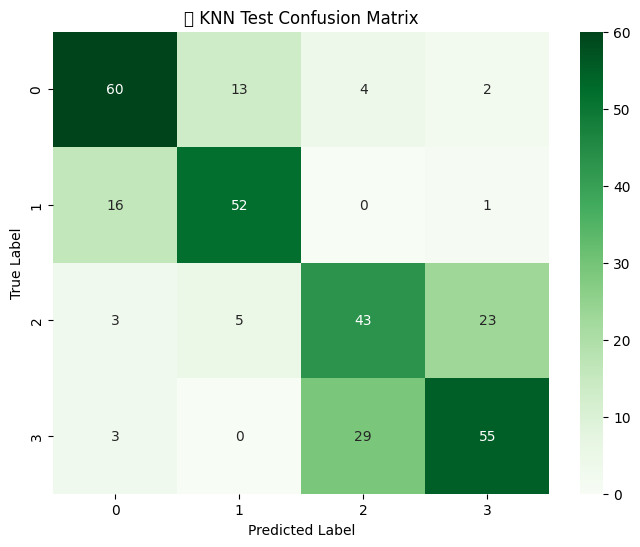

In [4]:
import os
import cv2
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract color histogram features
def extract_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    image = cv2.resize(image, (128, 128))  # Resize to standard size
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Main paths
main_dir = "Split_Data"
data = []
labels = []

# Load image data and labels
for phase in ["train", "test"]:
    phase_path = os.path.join(main_dir, phase)
    for root, dirs, files in os.walk(phase_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                full_path = os.path.join(root, file)

                # Extract pH value from filename
                match = re.search(r'pH(\d+)', file)
                if match:
                    pH = int(match.group(1))
                    features = extract_features(full_path)
                    if features is not None:
                        data.append(features)
                        labels.append(pH)
                else:
                    print(f"Could not extract pH from: {file}")

# Convert to arrays
X = np.array(data)
y = np.array(labels)

# Train/validation/test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)


# -------------------------- K-Nearest Neighbors --------------------------
print("\n👟 Training K-Nearest Neighbors with GridSearchCV...")
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
print(f"✅ Best KNN parameters: {grid_search_knn.best_params_}")

# Validation evaluation - KNN
val_preds_knn = best_knn.predict(X_val)
print("\n🔍 KNN Validation Metrics:")
print(classification_report(y_val, val_preds_knn))
print("✅ Validation Accuracy:", accuracy_score(y_val, val_preds_knn))

# Test evaluation - KNN
test_preds_knn = best_knn.predict(X_test)
print("\n📊 KNN Test Metrics:")
print(classification_report(y_test, test_preds_knn))
print("✅ Test Accuracy:", accuracy_score(y_test, test_preds_knn))

# Confusion matrix - KNN
conf_mat_knn = confusion_matrix(y_test, test_preds_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_knn, annot=True, fmt='d', cmap='Greens')
plt.title("🧪 KNN Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [3]:
pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl (37.3 MB)
Note: you may need to restart the kernel to use updated packages.
